# DataFrame

In [2]:
import numpy as np
import pandas as pd

## 创建

* 一维数组创建的是表中的列

In [11]:
df = pd.DataFrame([1,2,3])
df

,0
0,1
1,2
2,3


* 二维数组创建的还是二维表

In [4]:
df = pd.DataFrame([[1,2,3], [4,5,6], [7,8,9]])
df

,0,1,2
0,1,2,3
1,4,5,6
2,7,8,9


* 设置index

In [6]:
df = pd.DataFrame([[1,2,3], [4,5,6], [7,8,9]],
                 index=[1,2,3])
df

,0,1,2
1,1,2,3
2,4,5,6
3,7,8,9


* 设置列名

In [7]:
df = pd.DataFrame([[1,2,3], [4,5,6], [7,8,9]],
                 columns=['a', 'b', 'c'])
df

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


* 字典创建的表，key是列名，value是列。

In [8]:
df = pd.DataFrame({'a': [1,2,3], 'b': [4,5,6], 'c': [7,8,9]})
df

,a,b,c
0,1,4,7
1,2,5,8
2,3,6,9


* 更改index

In [9]:
df.index = [1,2,3]
df

,a,b,c
1,1,4,7
2,2,5,8
3,3,6,9


## 向量化操作

In [14]:
df1 = pd.DataFrame([1,2,3])
df1

,0
0,1
1,2
2,3


In [20]:
df2 = pd.DataFrame([1,2,3])
df2

,0
0,1
1,2
2,3


In [21]:
df1-df2

,0
0,0
1,0
2,0


In [25]:
# 更改index
df2.index = [1,2,3]
df2

,0
1,1
2,2
3,3


In [24]:
df1-df2

,0
0,NaN
1,1.0
2,1.0
3,NaN


In [18]:
# 更改列名
df2.columns = [1]
df2

,1
1,1
2,2
3,3


In [19]:
df1-df2

,0,1
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN


**`总结：`向量化操作时，使用index, coloum定位。**

## 数据的统计

In [27]:
df = pd.DataFrame([[1,2,3], [4,5,6], [7,8,9]])
df.describe() # 数据描述，更全面的了解数据
# var() 方差
# std() 标准差
# mean() 均值
# median() 中位数
# min() 最小值
# max() 最大值

,0,1,2
count,3.0,3.0,3.0
mean,4.0,5.0,6.0
std,3.0,3.0,3.0
min,1.0,2.0,3.0
25%,2.5,3.5,4.5
50%,4.0,5.0,6.0
75%,5.5,6.5,7.5
max,7.0,8.0,9.0


* 显示前面几行数据

In [30]:
df.head(2)

,0,1,2
0,1,2,3
1,4,5,6


* 显示后面几行数据

In [31]:
df.tail(2)

,0,1,2
1,4,5,6
2,7,8,9


## 索引

In [33]:
df = pd.DataFrame([[1,2,3], [4,5,6], [7,8,9]])
df

,0,1,2
0,1,2,3
1,4,5,6
2,7,8,9


* 顺序索引，区间 [行,列)

In [35]:
df.iloc[:2, :3]

,0,1,2
0,1,2,3
1,4,5,6


* 名称索引，区间 [行,列]

In [37]:
df.loc[:1, :2]

,0,1,2
0,1,2,3
1,4,5,6


In [40]:
df1 = df
df1.index = [4, 5, 6]
df1.columns = [7, 8, 9]
df1

,7,8,9
4,1,2,3
5,4,5,6
6,7,8,9


In [41]:
df1.loc[:5, :8]

,7,8
4,1,2
5,4,5


In [42]:
df1.loc[[5,6], [8,9]]

,8,9
5,5,6
6,8,9


* 索引可重复

In [44]:
df = pd.DataFrame([1,2,3,4], index=[0,1,1,2])
df

,0
0,1
1,2
1,3
2,4


In [45]:
df.loc[1, :]

,0
1,2
1,3


* 多种方式索引结果一样

In [46]:
df = pd.DataFrame({'a': [1,2,3], 'b': [4,5,6], 'c': [7,8,9]})
df

,a,b,c
0,1,4,7
1,2,5,8
2,3,6,9


In [56]:
df['b']
df.b
df.iloc[:, 1]
df.loc[:, 'b']

0    4
1    5
2    6
Name: b, dtype: int64

## 增加数据

In [79]:
df = pd.DataFrame([1,2,3])
df

,0
0,1
1,2
2,3


In [81]:
df.loc[3, 0] = 3
df

,0
0,1.0
1,2.0
2,3.0
3,3.0


In [83]:
df.loc[3, 1] = 1
df

,0,1
0,1.0,NaN
1,2.0,NaN
2,3.0,NaN
3,3.0,1.0


In [84]:
df[2] = 2
df

,0,1,2
0,1.0,NaN,2
1,2.0,NaN,2
2,3.0,NaN,2
3,3.0,1.0,2


* append() 按列对齐追加数据

In [96]:
df = pd.DataFrame({'a': [1,2,3], 'b': [4,5,6], 'c': [7,8,9]})
df.append(df)

,a,b,c
0,1,4,7
1,2,5,8
2,3,6,9
0,1,4,7
1,2,5,8
2,3,6,9


In [97]:
df = pd.DataFrame({'a': [1,2,3], 'b': [4,5,6], 'c': [7,8,9]})
df.append(df, ignore_index=True)

,a,b,c
0,1,4,7
1,2,5,8
2,3,6,9
3,1,4,7
4,2,5,8
5,3,6,9


In [104]:
df1 = df.copy()
df1.columns = ['b', 'c', 'd']
df.append(df1)

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,a,b,c,d
0,1.0,4,7,NaN
1,2.0,5,8,NaN
2,3.0,6,9,NaN
0,NaN,1,4,7.0
1,NaN,2,5,8.0
2,NaN,3,6,9.0


* concat()

In [101]:
# 默认axis=0
pd.concat([df, df])

,a,b,c
0,1,4,7
1,2,5,8
2,3,6,9
0,1,4,7
1,2,5,8
2,3,6,9


In [100]:
pd.concat([df, df], axis=1)

,a,b,c,a,b,c
0,1,4,7,1,4,7
1,2,5,8,2,5,8
2,3,6,9,3,6,9


In [105]:
df1 = df.copy()
df1.index = [1,2,3]
pd.concat([df, df1], axis=1)

,a,b,c,a,b,c
0,1.0,4.0,7.0,NaN,NaN,NaN
1,2.0,5.0,8.0,1.0,4.0,7.0
2,3.0,6.0,9.0,2.0,5.0,8.0
3,NaN,NaN,NaN,3.0,6.0,9.0


In [107]:
df1 = df.copy()
df1.index = [7,8,9]
pd.concat([df, df1], axis=1)

,a,b,c,a,b,c
0,1.0,4.0,7.0,NaN,NaN,NaN
1,2.0,5.0,8.0,NaN,NaN,NaN
2,3.0,6.0,9.0,NaN,NaN,NaN
7,NaN,NaN,NaN,1.0,4.0,7.0
8,NaN,NaN,NaN,2.0,5.0,8.0
9,NaN,NaN,NaN,3.0,6.0,9.0


## 表合并 merge

In [109]:
df1 = pd.DataFrame([{'id':1, 'name': '王', 'age': 10}, 
                    {'id':2, 'name': '赵', 'age': 9},
                    {'id':3, 'name': '钱', 'age': 12}])
df1

,age,id,name
0,10,1,王
1,9,2,赵
2,12,3,钱


In [110]:
df2 = pd.DataFrame([{'id':1, 'sex': '男'}, 
                    {'id':2, 'sex': '男'},
                    {'id':4, 'sex': '女'}])
df2

,id,sex
0,1,男
1,2,男
2,4,女


* 左连接

In [112]:
pd.merge(df1, df2, how='left', left_on='id', right_on='id')

,age,id,name,sex
0,10,1,王,男
1,9,2,赵,男
2,12,3,钱,NaN


* 右连接

In [113]:
pd.merge(df1, df2, how='right', left_on='id', right_on='id')

,age,id,name,sex
0,10.0,1,王,男
1,9.0,2,赵,男
2,NaN,4,NaN,女


* 内连接

In [114]:
pd.merge(df1, df2, how='inner', left_on='id', right_on='id')

,age,id,name,sex
0,10,1,王,男
1,9,2,赵,男


* 外连接

In [115]:
pd.merge(df1, df2, how='outer', left_on='id', right_on='id')

,age,id,name,sex
0,10.0,1,王,男
1,9.0,2,赵,男
2,12.0,3,钱,NaN
3,NaN,4,NaN,女


## 删除数据

In [122]:
df = pd.DataFrame([{'id':1, 'name': '王', 'age': 10, 'sex': '男'}, 
                    {'id':2, 'name': '赵', 'age': 9, 'sex': '男'},
                    {'id':3, 'name': '钱', 'age': 12, 'sex': '女'}])
df

,age,id,name,sex
0,10,1,王,男
1,9,2,赵,男
2,12,3,钱,女


* 删除列数据

In [124]:
df.drop(columns=['id'])

,age,name,sex
0,10,王,男
1,9,赵,男
2,12,钱,女


* 删除行数据

In [125]:
df.drop(index=[1])

,age,id,name,sex
0,10,1,王,男
2,12,3,钱,女


* 同时删除行和列数据

In [126]:
df.drop(index=[1], columns=['id', 'age'])

,name,sex
0,王,男
2,钱,女


## 修改数据

In [131]:
df = pd.DataFrame(np.random.randn(6,6))
df

,0,1,2,3,4,5
0,0.319174,1.609831,-0.964066,-0.380865,0.018081,0.542387
1,1.108967,0.527681,-0.771069,-0.933623,1.282539,0.876389
2,-0.434150,0.423575,0.015826,0.967465,-0.423929,-0.775422
3,0.229241,0.284101,0.792707,1.852971,-0.678815,0.541595
4,-2.309630,-2.756065,-1.058321,-0.762256,1.634628,0.023694
5,0.150385,-0.899063,-0.765463,-0.906649,-0.596851,1.556652


* 修改行数据

In [136]:
df.iloc[1,:] = 1
df

,0,1,2,3,4,5
0,0.319174,1.609831,-0.964066,3,0.018081,0.542387
1,1.000000,1.000000,1.000000,1,1.000000,1.000000
2,-0.434150,0.423575,0.015826,3,-0.423929,-0.775422
3,0.229241,0.284101,0.792707,3,-0.678815,0.541595
4,-2.309630,-2.756065,-1.058321,3,1.634628,0.023694
5,0.150385,-0.899063,-0.765463,3,-0.596851,1.556652


* 修改列数据

In [137]:
df.iloc[:,3] = 3
df

,0,1,2,3,4,5
0,0.319174,1.609831,-0.964066,3,0.018081,0.542387
1,1.000000,1.000000,1.000000,3,1.000000,1.000000
2,-0.434150,0.423575,0.015826,3,-0.423929,-0.775422
3,0.229241,0.284101,0.792707,3,-0.678815,0.541595
4,-2.309630,-2.756065,-1.058321,3,1.634628,0.023694
5,0.150385,-0.899063,-0.765463,3,-0.596851,1.556652


* 修改行和列数据

In [138]:
df.iloc[2:4, 2:4] = 4
df

,0,1,2,3,4,5
0,0.319174,1.609831,-0.964066,3,0.018081,0.542387
1,1.000000,1.000000,1.000000,3,1.000000,1.000000
2,-0.434150,0.423575,4.000000,4,-0.423929,-0.775422
3,0.229241,0.284101,4.000000,4,-0.678815,0.541595
4,-2.309630,-2.756065,-1.058321,3,1.634628,0.023694
5,0.150385,-0.899063,-0.765463,3,-0.596851,1.556652


## 处理iris数据集

In [153]:
from sklearn.datasets import load_iris
data = load_iris().data

* 第一列大于中位数的值加1

In [154]:
X = pd.DataFrame(data)

# 保存修改前的数据
series1 = pd.Series(X.loc[X.iloc[:, 0]>X.iloc[:, 0].median(), 0])

X.loc[X.iloc[:, 0]>X.iloc[:, 0].median(), 0] += 1

# 保存修改后的数据
series2 = pd.Series(X.loc[X.iloc[:, 0]>X.iloc[:, 0].median(), 0])

pd.DataFrame([series1, series2, series2-series1], index=['change before', 'change after', 'difference'])

,50,51,52,54,56,58,61,62,63,65,...,139,140,141,143,144,145,146,147,148,149
change before,7.0,6.4,6.9,6.5,6.3,6.6,5.9,6.0,6.1,6.7,...,6.9,6.7,6.9,6.8,6.7,6.7,6.3,6.5,6.2,5.9
change after,8.0,7.4,7.9,7.5,7.3,7.6,6.9,7.0,7.1,7.7,...,7.9,7.7,7.9,7.8,7.7,7.7,7.3,7.5,7.2,6.9
difference,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


* 既要第一列大于中位数，又要满足第二列大于中位数

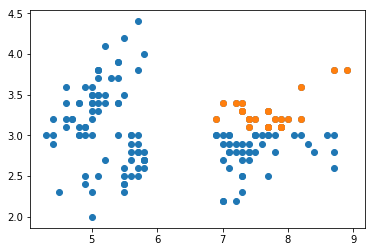

In [179]:
X = pd.DataFrame(data)
median1 = X[0].median()
median2 = X[1].median()

index = (X[0]>median1) & (X[1]>median2)

import matplotlib.pyplot as plt
plt.figure()
plt.scatter(X[0], X[1])
plt.scatter(X[index][0], X[index][1])
# plt.scatter(X.loc[index, 0], X.loc[index, 1]) #另一种取数方式
plt.show()

## Series

In [58]:
series = pd.Series([1,2,3])
series

0    1
1    2
2    3
dtype: int64

In [59]:
series[series>=2]

1    2
2    3
dtype: int64

In [60]:
series >= 2

0    False
1     True
2     True
dtype: bool

In [65]:
df[df.a>df.a.median()]

,a,b,c
2,3,6,9
